## Simple MLP 

This notebook demonstrates the use of Keras to build a simple multi layer perceptron (MLP) neural network.

It uses the pima-indians dataset as an example problem.


## 1 - Packages

Run the cell below to import all the packages we need for this notebook

In [1]:
# load required libs
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import os

%matplotlib inline
print(plt.rcParams['figure.figsize'])
plt.rcParams['figure.figsize'] = [6, 4]

Using TensorFlow backend.


[6.0, 4.0]


## 2 - Setting the random seed

We set the random seed below so that the results are reproducible.

In [2]:
np.random.seed(7)

## 3 - Loading the dataset



In [3]:
absdir = os.path.dirname(os.path.realpath('__file__'))
datapath = "../data/pima-indians-diabetes.csv"
dataset = np.loadtxt(os.path.join(absdir, datapath), delimiter=",")
X = dataset[:, 0:8]
y = dataset[:, 8]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


## 4 - Network structure

The network has the following structure:

`Input (8) -> Hidden Layer (12) -> Output Layer (1)`

We use the ReLU activation functions in the hidden layers and sigmoid activation function in the output layer as it is predicting a binary classification.

We compile the model to optimize the binary crossentropy loss since it is a binary classification problem and use the Adam optimizer to speed up learning. 

We train the model using mini-batch gradient descent with a batch size of 10 for 150 epochs.

Since the dataset is small, we set aside 25% of the training data as a validation set which is passed to validation_split.

The loss and validation accuracies are collated in a history dictionary which we use to plot the model's performance further down.

In [4]:
def base_model(initializer="uniform"):
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=initializer, activation='relu'))
    model.add(Dense(8, kernel_initializer=initializer, activation='relu'))
    model.add(Dense(1, kernel_initializer=initializer, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = base_model()
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

scores = model.evaluate(X, y, verbose=0)
print("{}: {:.2f}%".format(model.metrics_names[0].capitalize(), scores[0]*100))
print("{}: {:.2f}%".format(model.metrics_names[1].capitalize(), scores[1]*100))

Loss: 48.26%
Acc: 77.34%


## 5 - Plotting the model performance

We plot the training loss and validation loss from the history object above.

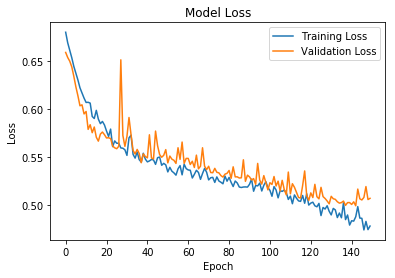

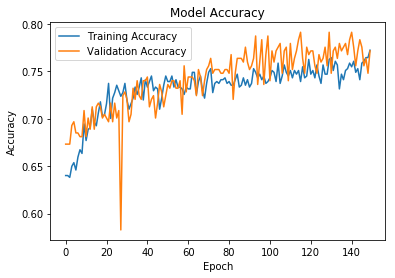

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()